In [10]:
import nltk
from collections import Counter
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from pathlib import Path
from wordcloud import WordCloud

import json
import matplotlib.pyplot as plt
import os


In [11]:
resources = [
    "punkt",
    "punkt_tab",
    "stopwords",
    "averaged_perceptron_tagger_eng",
]

for res in resources:
    try:
        if res.startswith("averaged"):
            nltk.data.find("taggers/" + res)
        else:
            nltk.data.find("tokenizers/" + res)
    except LookupError:
        nltk.download(res)


[nltk_data] Downloading package stopwords to /home/pavel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
def extract_pos_words(text):
    words = word_tokenize(text)

    stop_words = set(stopwords.words("english"))
    clean_words = [w for w in words if w.lower() not in stop_words and w.isalnum()]

    tagged_words = nltk.pos_tag(clean_words)

    pos_data = {"Nouns": [], "Verbs": [], "Adjectives": []}

    for word, tag in tagged_words:
        # NN* = Nouns (NN, NNS, NNP...)
        if tag.startswith("NN"):
            pos_data["Nouns"].append(word)
        # VB* = Verbs (VB, VBD, VBG...)
        elif tag.startswith("VB"):
            pos_data["Verbs"].append(word)
        # JJ* = Adjectives (JJ, JJR...)
        elif tag.startswith("JJ"):
            pos_data["Adjectives"].append(word)

    return pos_data


In [13]:
def generate_pos_clouds(pos_data, source_file):
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    categories = ["Nouns", "Verbs", "Adjectives"]

    wc_config = {
        "width": 800,
        "height": 400,
        "background_color": "white",
        "colormap": "viridis",
        "random_state": 42,
    }

    for ax, category in zip(axes, categories):
        words = pos_data[category]
        text_content = " ".join(words)

        ax.set_title(f"{category} ({len(words)} found)", fontsize=16)
        ax.axis("off")

        if text_content.strip():
            wc = WordCloud(**wc_config).generate(text_content)
            ax.imshow(wc, interpolation="bilinear")
        else:
            ax.text(0.5, 0.5, "No words found", ha="center", va="center")

    plt.tight_layout()

    output_path = source_file.with_name(f"{source_file.stem}_pos_cloud.png")

    plt.savefig(output_path)
    plt.show()
    print(f"Saved visualization to: {output_path}")


Found 1 files. Generating POS clouds...

Processing: the_call_of_cthulhu.txt


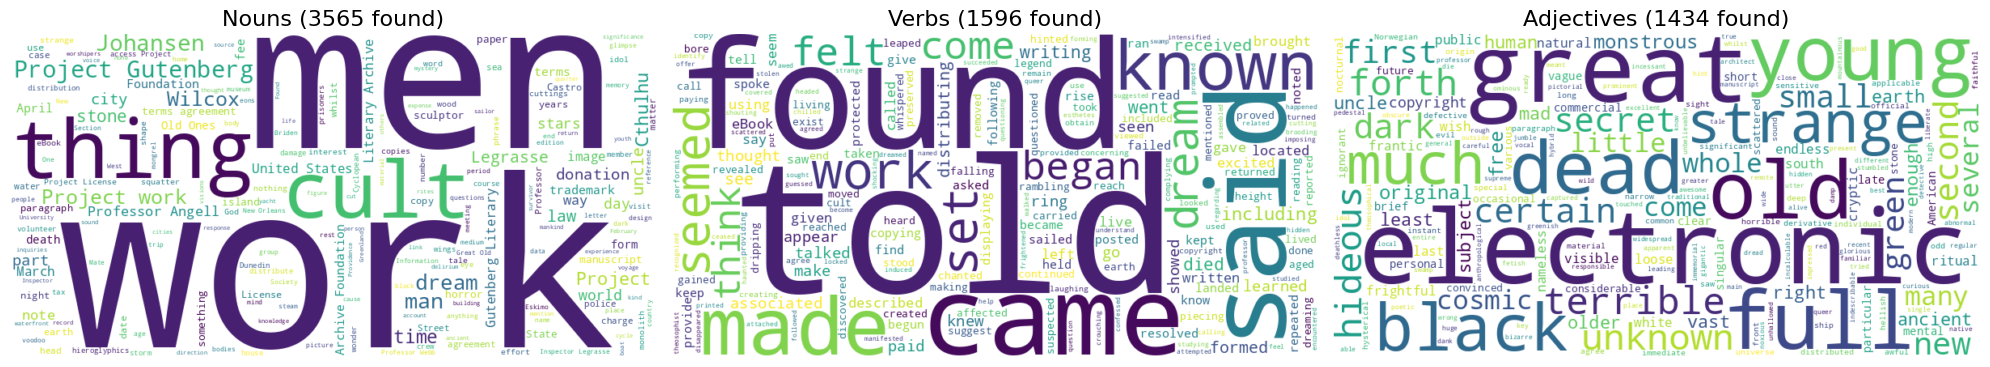

Saved visualization to: ../data/the_call_of_cthulhu_pos_cloud.png


In [14]:
DATA_DIR = Path("../data")

if DATA_DIR.exists() and DATA_DIR.is_dir():
    files = list(DATA_DIR.glob("*.txt"))

    if not files:
        print(f"No .txt files found in {DATA_DIR.resolve()}")
    else:
        print(f"Found {len(files)} files. Generating POS clouds...")

        for file_path in files:
            try:
                text = file_path.read_text(encoding="utf-8")
                pos_data = extract_pos_words(text)
                print(f"\nProcessing: {file_path.name}")
                generate_pos_clouds(pos_data, file_path)

            except Exception as error:
                print(f"Error processing {file_path.name}: {error}")
else:
    print(f"Directory {DATA_DIR.resolve()} does not exist.")
